In [71]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np



In [84]:
# Load the dataset
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv') 


# Set Flag
train_data["train_flag"] = 1
test_data["train_flag"] = 0
test_data["y"] = -99 # temporary

# merge
titanic_data = pd.concat([train_data, test_data], axis = 0)

In [85]:
print(titanic_data.columns)

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'train_flag'],
      dtype='object')


In [86]:
titanic_data.head(2)

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no,1
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no,1


In [66]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 521
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  y           4521 non-null   object
 17  train_flag  4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 671.1+ KB


In [89]:
titanic_data['y'] = titanic_data['y'].map({'yes': 1, 'no': 0,-99:-99})

In [90]:
titanic_data['y'].unique()

array([  0,   1, -99])

In [91]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 521
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  y           4521 non-null   int64 
 17  train_flag  4521 non-null   int64 
dtypes: int64(9), object(9)
memory usage: 671.1+ KB


In [92]:
cat_features=[i for i in titanic_data.columns if titanic_data.dtypes[i]=='object']

In [93]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [94]:
# Convert categorical variables to numerical

label_encoder = LabelEncoder()
for col in cat_features:
    titanic_data[col] = label_encoder.fit_transform(titanic_data[col])


In [95]:
titanic_data.job.unique()

array([10,  7,  4,  1,  6,  9,  2,  0,  8,  3,  5, 11])

In [96]:
titanic_data.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,train_flag
0,1,30,10,1,0,0,1787,0,0,0,10,79,1,-1,0,3,0,1
1,2,33,7,1,1,0,4789,1,1,0,8,220,1,339,4,0,0,1
2,3,35,4,2,2,0,1350,1,0,0,0,185,1,330,1,0,0,1


In [104]:
features = set(titanic_data.columns)
features.remove('y')
features = list(features)

In [105]:
# Split the dataset into training and testing sets
train_data = titanic_data[titanic_data["train_flag"] == 1]
test_data = titanic_data[titanic_data["train_flag"] == 0]
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data['y'], test_size=0.2, random_state=42)

# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [106]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.91


AUC-ROC: 0.91


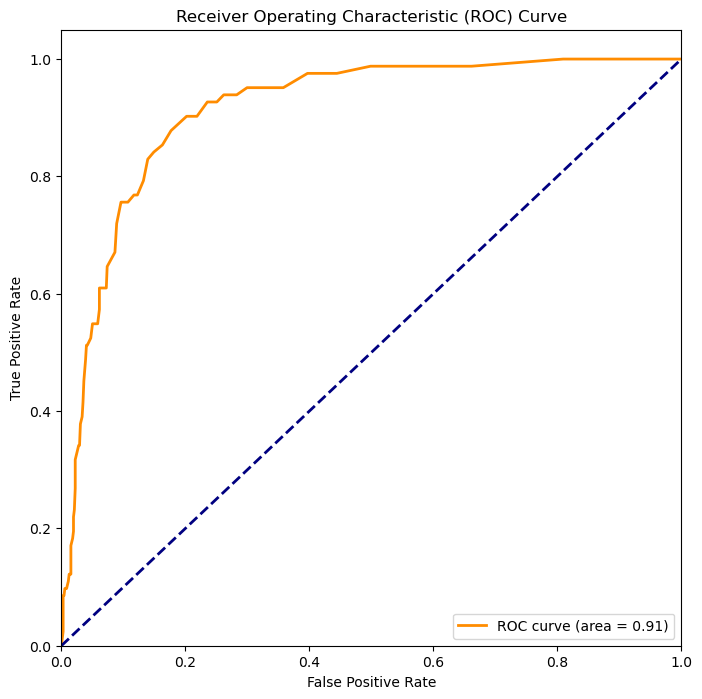


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       718
           1       0.61      0.30      0.41        82

    accuracy                           0.91       800
   macro avg       0.77      0.64      0.68       800
weighted avg       0.89      0.91      0.89       800



In [107]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f'AUC-ROC: {roc_auc:.2f}')

# Display ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

In [116]:
test_x = test_data[features]

y_test_pred = model.predict_proba(test_x)[:, 1]


In [117]:
answer = pd.DataFrame({'id': test_data['id'], 'y': y_test_pred})

# Save the DataFrame to a CSV file
answer.to_csv('submission.csv', index=False)

In [118]:
print(answer.head())

     id     y
0  4000  0.31
1  4001  0.20
2  4002  0.13
3  4003  0.20
4  4004  0.13
